# Creating Map based on GPX

I need to create a simple map which has a point as my location plus direction where I was moving to

In [16]:
import gpxpy
import pandas as pd
import matplotlib.pyplot as plt

# Get the data

In [18]:
gpx_file = open('data/Morning_Run.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

run_data = []

data = gpx.tracks[0].segments[0].points
for point in data:
    run_data.append([
        point.time,
        point.longitude, 
        point.latitude,      
    ])
    
run_data_df = pd.DataFrame(
    run_data, 
    columns=[
        'time',
        'lon',
        'lat',
    ])
    
run_data_df.head()

time         lon       lat
0 2022-05-28 22:40:09+00:00  103.895445  1.309428
1 2022-05-28 22:40:10+00:00  103.895423  1.309422
2 2022-05-28 22:40:11+00:00  103.895407  1.309423
3 2022-05-28 22:40:12+00:00  103.895397  1.309432
4 2022-05-28 22:40:13+00:00  103.895378  1.309435

# Plot on 2D map

Two dimensional plot

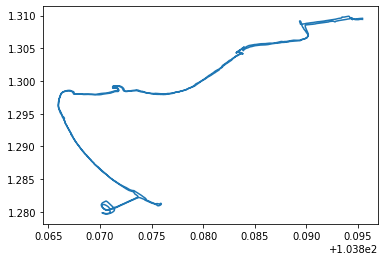

In [19]:
plt.plot(run_data_df['lon'], run_data_df['lat'])

# Plot on the actual map

Let's plot on the map!

In [23]:
BBox = (
    run_data_df.lon.min(),   
    run_data_df.lon.max(),      
    run_data_df.lat.min(), 
    run_data_df.lat.max()
)
print(BBox)

(103.865955, 103.895445, 1.279672, 1.309908)


Export the image based on these dimensions from https://www.openstreetmap.org/ Also pick a random point for plotting.

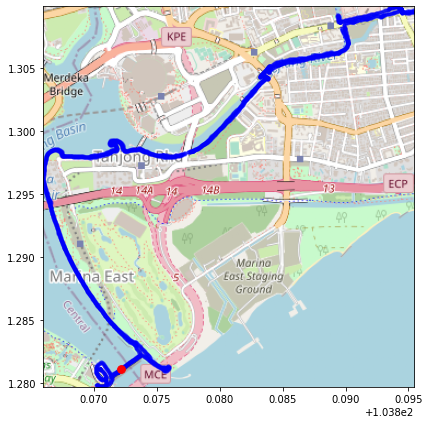

In [33]:
run_map = plt.imread('maps/run_map.png')

fig, ax = plt.subplots(figsize = (8,7))

ax.scatter(run_data_df.lon, run_data_df.lat, zorder=1, alpha= 0.2, c='b', s=10)

point_df = run_data_df.sample(n=1)
ax.scatter(point_df.lon, point_df.lat, zorder=1, alpha=1, c='r', s=60, marker='o')

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(run_map, zorder=0, extent = BBox, aspect= 'equal')